Classification tree on titanic dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn    import tree

In [35]:
df=sns.load_dataset('titanic')

In [36]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [37]:
X= df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y= df['survived']

In [38]:

X=pd.get_dummies(X,columns=['sex'])


In [39]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [42]:
X.age.fillna(value=X['age'].mean(),inplace= True)
X

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,22.000000,1,0,7.2500,False,True
1,1,38.000000,1,0,71.2833,True,False
2,3,26.000000,0,0,7.9250,True,False
3,1,35.000000,1,0,53.1000,True,False
4,3,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,False,True
887,1,19.000000,0,0,30.0000,True,False
888,3,29.699118,1,2,23.4500,True,False
889,1,26.000000,0,0,30.0000,False,True


In [43]:
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [45]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [51]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7877094972067039


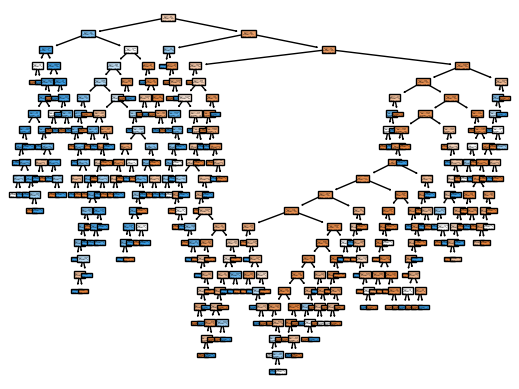

<Figure size 640x480 with 0 Axes>

In [52]:
tree.plot_tree(model.fit(X,y),filled=True)
plt.show()
plt.savefig('tree.png')

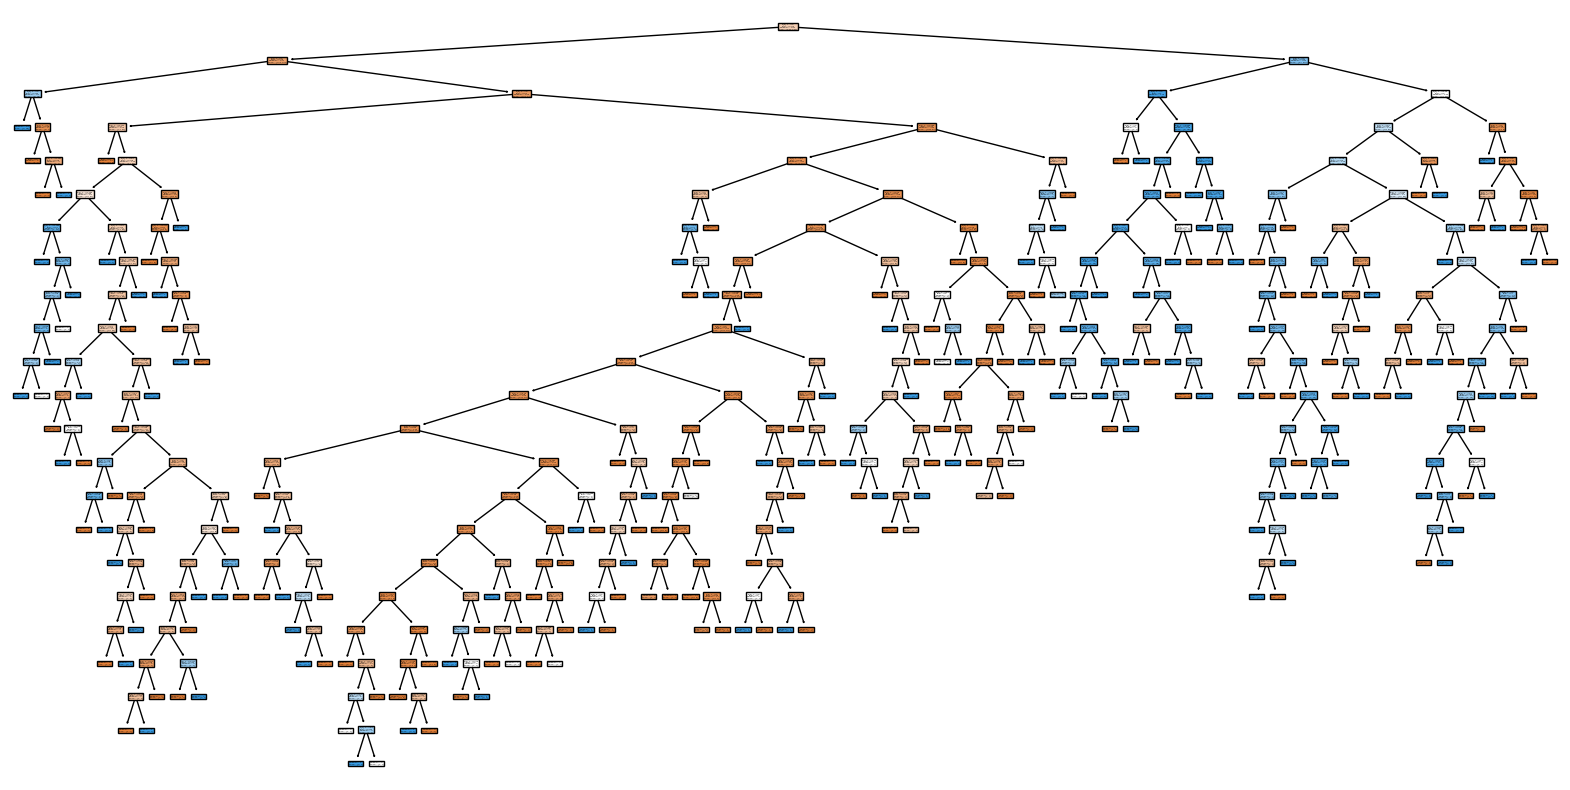

<Figure size 640x480 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X,y),filled =True)
plt.show()
plt.savefig('Decision Tree pdf',format='pdf',dpi=300)

Model Evolution 

In [57]:
#Precision metrix
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred)

0.7090909090909091

### Precision: precision measures the proportion of true positive predictions among all positive predictions 

In [58]:
recall_score(y_test,y_pred)

0.639344262295082

### Recall: Recall mesures the proportion of true positive predictions among all actual positive instances.

In [59]:
f1_score(y_test,y_pred) #f1 score is a harmonic mean of precision and recall score

0.6724137931034484

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[102,  16],
       [ 22,  39]], dtype=int64)

<Axes: >

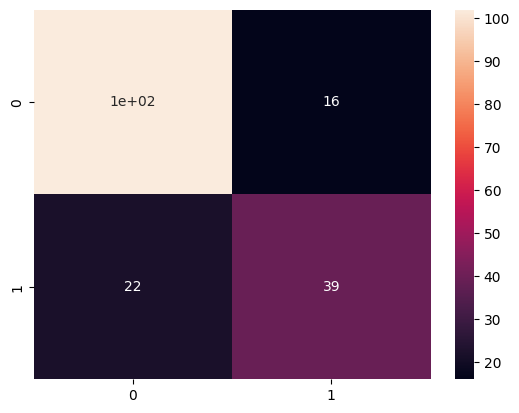

In [65]:
sns.heatmap(cm,annot=True)

### K Nearest Neeigbhors (KNN)

to best fit the n_neigbhor values (n_neighbor=5 or 10)\
to decide n_neighbor a term usedd "Hyper parameter tunneing"\
GSCV Grid search cross validation 

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=10)
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[106,  12],
       [ 33,  28]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

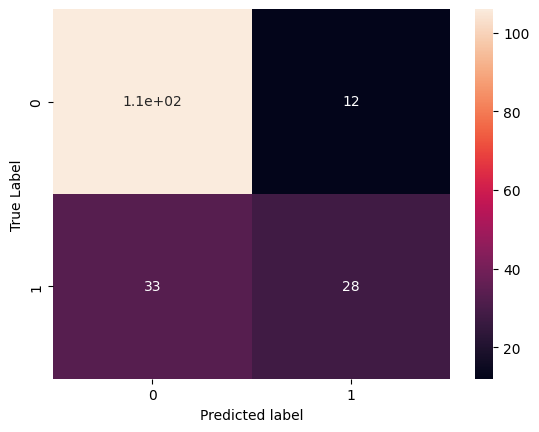

In [84]:
sns.heatmap(cm,annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted label')

In [85]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred)

0.7

In [86]:
recall_score(y_test,y_pred)

0.45901639344262296

### Random Forest 


In [91]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print (cm)
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

[[104  14]
 [ 20  41]]
precision_score 0.7454545454545455
recall_score 0.6721311475409836
f1_score 0.7068965517241379


### Logistics Regression
it is a classification model on basis of its output
A function use in it is called sigmoid function

In [92]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print (cm)
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

[[102  16]
 [ 23  38]]
precision_score 0.7037037037037037
recall_score 0.6229508196721312
f1_score 0.6608695652173914


c:\Users\B S COM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM

In [94]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print (cm)
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

[[110   8]
 [ 46  15]]
precision_score 0.6521739130434783
recall_score 0.2459016393442623
f1_score 0.3571428571428571


### Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB

model4=GaussianNB()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print (cm)
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

[[104  14]
 [ 27  34]]
precision_score 0.7083333333333334
recall_score 0.5573770491803278
f1_score 0.6238532110091743


### Now we will compare all above models with each other and find out the best suiable fit model with our data

In [96]:
#import libraries and models
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

#define the model to be evaluted
models=[LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),SVC()]
names=['LogisticRegression','KNeighborsClassifier','RandomForestClassifier','SVC']

#perform K fold cross validation for each model
#check for K score search for it
k=10
for name, model in zip(names,models):
    cv_scores=cross_val_score(model,X_train,y_train,cv=k)
    print(f"{name} CV accuracy:{np.mean(cv_scores):3f} +/-{np.std(cv_scores):.3f}" )

c:\Users\B S COM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\B S COM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

LogisticRegression CV accuracy:0.799120 +/-0.049
KNeighborsClassifier CV accuracy:0.707903 +/-0.055
RandomForestClassifier CV accuracy:0.818721 +/-0.039
SVC CV accuracy:0.675606 +/-0.045


from the above comparision it is observed that RF has best accuracy so \ 
to visulize it through code we apply command here a gridsearch CV

Tunning of data best tunning format we are extracting such as values of kernel ,gamma etc for best accuracy
It is called hyper parametric tunneing it is individually done for each model

In [98]:
from sklearn.model_selection import GridSearchCV
# define the parameter grid 
param_grid ={'C':[0.1,1,10],
             "kernel" :['linear','rbf'],
             'gamma':[0.1,1,10]}
grid_search= GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f} ".format(grid_search.best_score_))

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.80 
